Tanmay Ajay Joshi 200070027

Anubhav Bhatla 200070008

Amruta Mahendra Parulekar 20d070009

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(7000000)

# **Question - 1**

## Part-(a)

### Given below is the code to generate a Poisson stimulus with the given parameters. The time stamps at which the stimulus is high have also been printed

In [2]:
# Define parameters
T = 500*1e-3
dt = 0.1*1e-3
lmbda = 10*dt  # Arrival rate

num_steps = int(T/dt)
t = np.arange(0,num_steps)*dt # Time axis for plotting

spike_times = [] # Array to store arrival times
spikes = np.zeros(num_steps)

# Generate Poisson events
for step in range(num_steps):
    # Generate a random number from a Poisson distribution with the given lambda
    event = np.random.poisson(lmbda)

    # If an event occurred, record the time
    if event > 0:
        spike_time = round(step*dt, 4)
        spike_times.append(spike_time)
        spikes[step] = 1

print("Spike Times (in s):", spike_times)

Spike Times (in s): [0.0776, 0.0873, 0.1463, 0.222, 0.2811, 0.3067, 0.3637, 0.3703]


## Part-(b)

In [3]:
I0 = 1e-12
we = 500
tau = 15*1e-3
taus = tau/4

Iapp = np.zeros(num_steps)

for step in range(num_steps):
  for spike in spike_times:
    if (spike > step*dt):
      break
    Iapp[step] += I0*we*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

In [4]:
C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

V = np.zeros(num_steps);
U = np.zeros(num_steps);
V[0] = -70e-3;
U[0] = 0;

for time in range(num_steps-1):
  kv = (1/C)*(-gL*(V[time] - EL) + gL*deltaT*pow(math.e,((V[time] - VT)/deltaT)) + Iapp[time] - U[time])
  ku = (1/tauw)*(a*(V[time] - EL) - U[time])
  V[time + 1] = V[time] + kv*dt #updated V using Euler's method
  U[time + 1] = U[time] + ku*dt #updated U using Euler's method

  if (V[time + 1] >= 0): #identify a spike for a neuron
    V[time + 1] = Vr # reset the voltage
    V[time] = 0
    U[time + 1] = U[time] + b # reset U

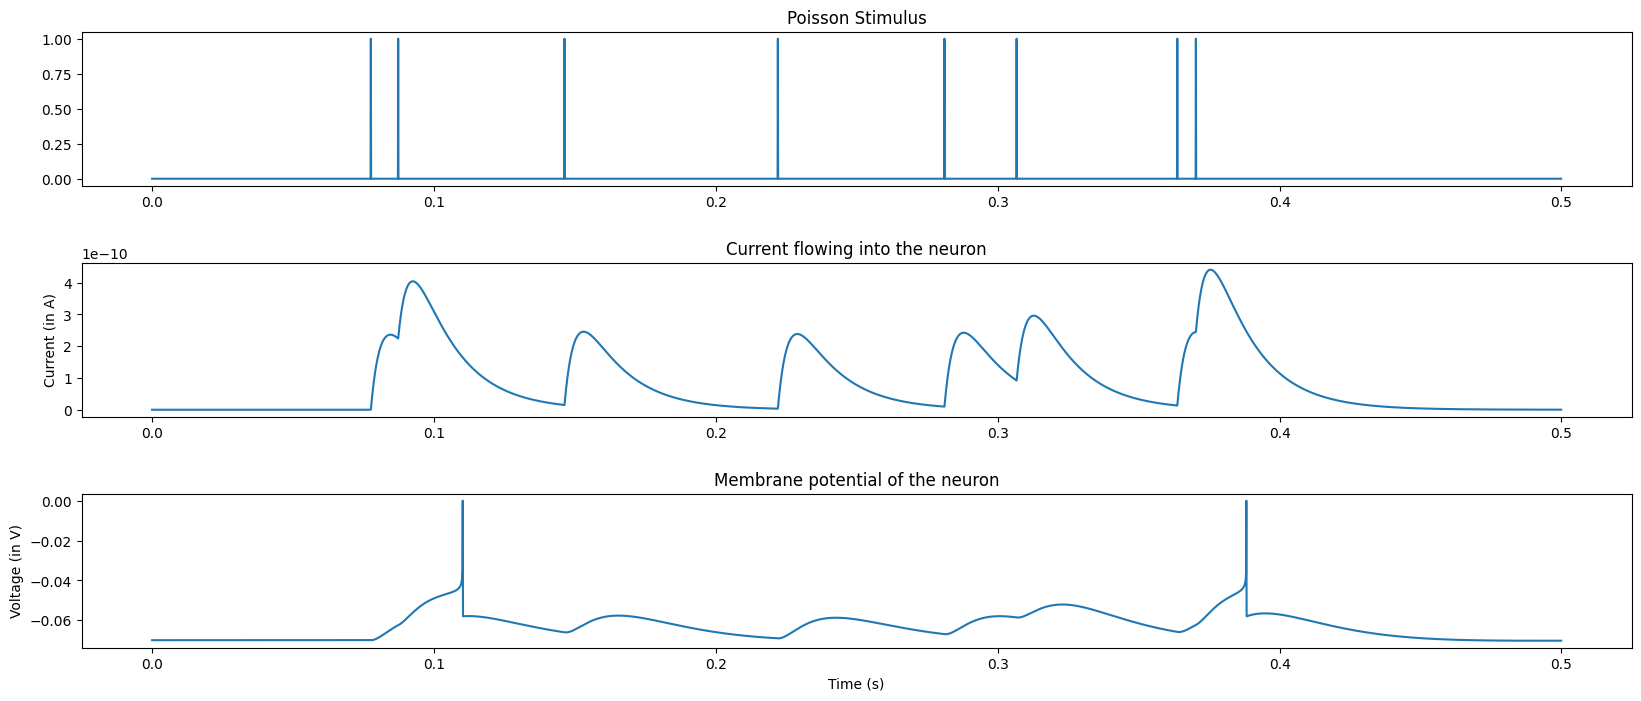

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))
axes[0].plot(t, spikes)
axes[0].set_title("Poisson Stimulus")

axes[1].plot(t, Iapp)
axes[1].set_title("Current flowing into the neuron")
axes[1].set_ylabel("Current (in A)")

axes[2].plot(t, V)
axes[2].set_title("Membrane potential of the neuron")
axes[2].set_ylabel("Voltage (in V)")

axes[2].set_xlabel("Time (s)", fontsize=10)

plt.subplots_adjust(hspace=0.5)

### We observe that when we have two closely-spaced stimuli, a large current flows into the neuron and causes a spike. Otherwise the current is insufficient to cause the neuron to spike

# **Question - 2**

## Part-(a)

In [6]:
# Define parameters
T = 500*1e-3
dt = 0.1*1e-3
lmbda = 1*dt  # Arrival rate in per millisecond (10/s converted to per ms)

num_steps = int(T/dt)
t = np.arange(0,num_steps)*dt # Time axis for plotting

I0 = 1e-12
we = np.zeros(100)
tau = 15*1e-3
taus = tau/4

spike_times_all = [] # Array to store arrival times for all synapses
# spikes = np.zeros(num_steps)

Iapp = np.zeros(num_steps)

# Generate Poisson events
for i in range(100):
  spike_times = []
  for step in range(num_steps):
      # Generate a random number from a Poisson distribution with the given lambda
      event = np.random.poisson(lmbda)

      # If an event occurred, record the time
      if event > 0:
          spike_time = round(step*dt, 4)
          spike_times.append(spike_time)
          # spikes[step] = 1
  spike_times_all.append(spike_times)

we = np.random.normal(50, 5, 100)

for step in range(num_steps):
  for i in range(100):
    for spike in spike_times_all[i]:
      if (spike > step*dt):
        break
      Iapp[step] += I0*we[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

In [7]:
C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

V = np.zeros(num_steps);
U = np.zeros(num_steps);
V[0] = -70e-3;
U[0] = 0;

for time in range(num_steps-1):
  kv = (1/C)*(-gL*(V[time] - EL) + gL*deltaT*pow(math.e,((V[time] - VT)/deltaT)) + Iapp[time] - U[time])
  ku = (1/tauw)*(a*(V[time] - EL) - U[time])
  V[time + 1] = V[time] + kv*dt #updated V using Euler's method
  U[time + 1] = U[time] + ku*dt #updated U using Euler's method

  if (V[time + 1] >= 0): #identify a spike for a neuron
    V[time + 1] = Vr # reset the voltage
    V[time] = 0
    U[time + 1] = U[time] + b # reset U

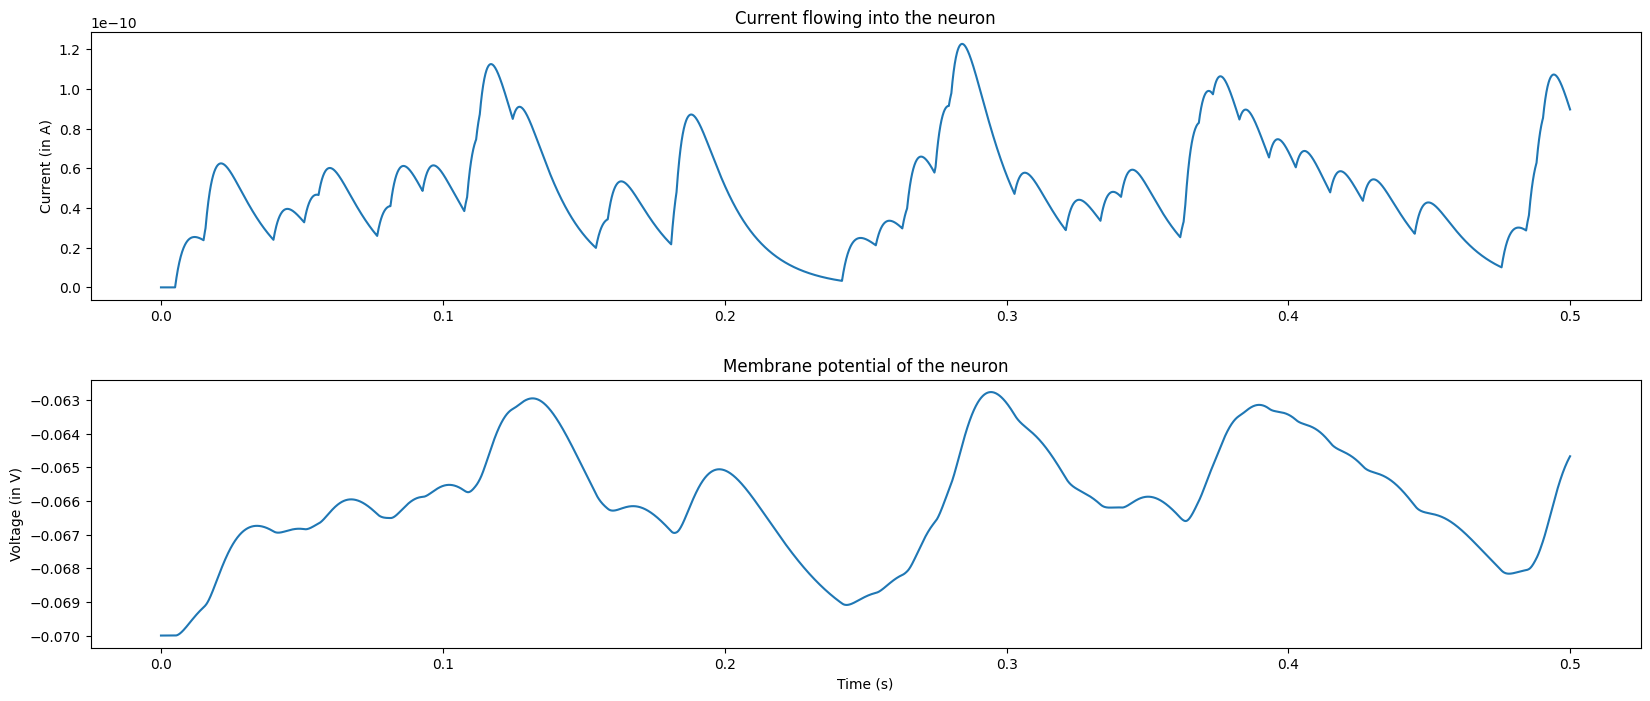

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 8))

axes[0].plot(t, Iapp)
axes[0].set_title("Current flowing into the neuron")
axes[0].set_ylabel("Current (in A)")

axes[1].plot(t, V)
axes[1].set_title("Membrane potential of the neuron")
axes[1].set_ylabel("Voltage (in V)")

axes[1].set_xlabel("Time (s)", fontsize=10)

plt.subplots_adjust(hspace=0.3)

### We observe no spikes for these weights because of insufficient current flowing into the neuron

## Part-(b)

In [9]:
# Define parameters
T = 500*1e-3
dt = 0.1*1e-3
lmbda = 1*dt  # Arrival rate in per millisecond (10/s converted to per ms)

num_steps = int(T/dt)
t = np.arange(0,num_steps)*dt # Time axis for plotting

I0 = 1e-12
we = np.zeros(100)
tau = 15*1e-3
taus = tau/4

spike_times_all = [] # Array to store arrival times for all synapses
# spikes = np.zeros(num_steps)

Iapp = np.zeros(num_steps)

# Generate Poisson events
for i in range(100):
  spike_times = []
  for step in range(num_steps):
      # Generate a random number from a Poisson distribution with the given lambda
      event = np.random.poisson(lmbda)

      # If an event occurred, record the time
      if event > 0:
          spike_time = round(step*dt, 4)
          spike_times.append(spike_time)
          # spikes[step] = 1
  spike_times_all.append(spike_times)

we = np.random.normal(250, 25, 100)

for step in range(num_steps):
  for i in range(100):
    for spike in spike_times_all[i]:
      if (spike > step*dt):
        break
      Iapp[step] += I0*we[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

In [10]:
C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

V = np.zeros(num_steps);
U = np.zeros(num_steps);
V[0] = -70e-3;
U[0] = 0;

for time in range(num_steps-1):
  kv = (1/C)*(-gL*(V[time] - EL) + gL*deltaT*pow(math.e,((V[time] - VT)/deltaT)) + Iapp[time] - U[time])
  ku = (1/tauw)*(a*(V[time] - EL) - U[time])
  V[time + 1] = V[time] + kv*dt #updated V using Euler's method
  U[time + 1] = U[time] + ku*dt #updated U using Euler's method

  if (V[time + 1] >= 0): #identify a spike for a neuron
    V[time + 1] = Vr # reset the voltage
    V[time] = 0
    U[time + 1] = U[time] + b # reset U

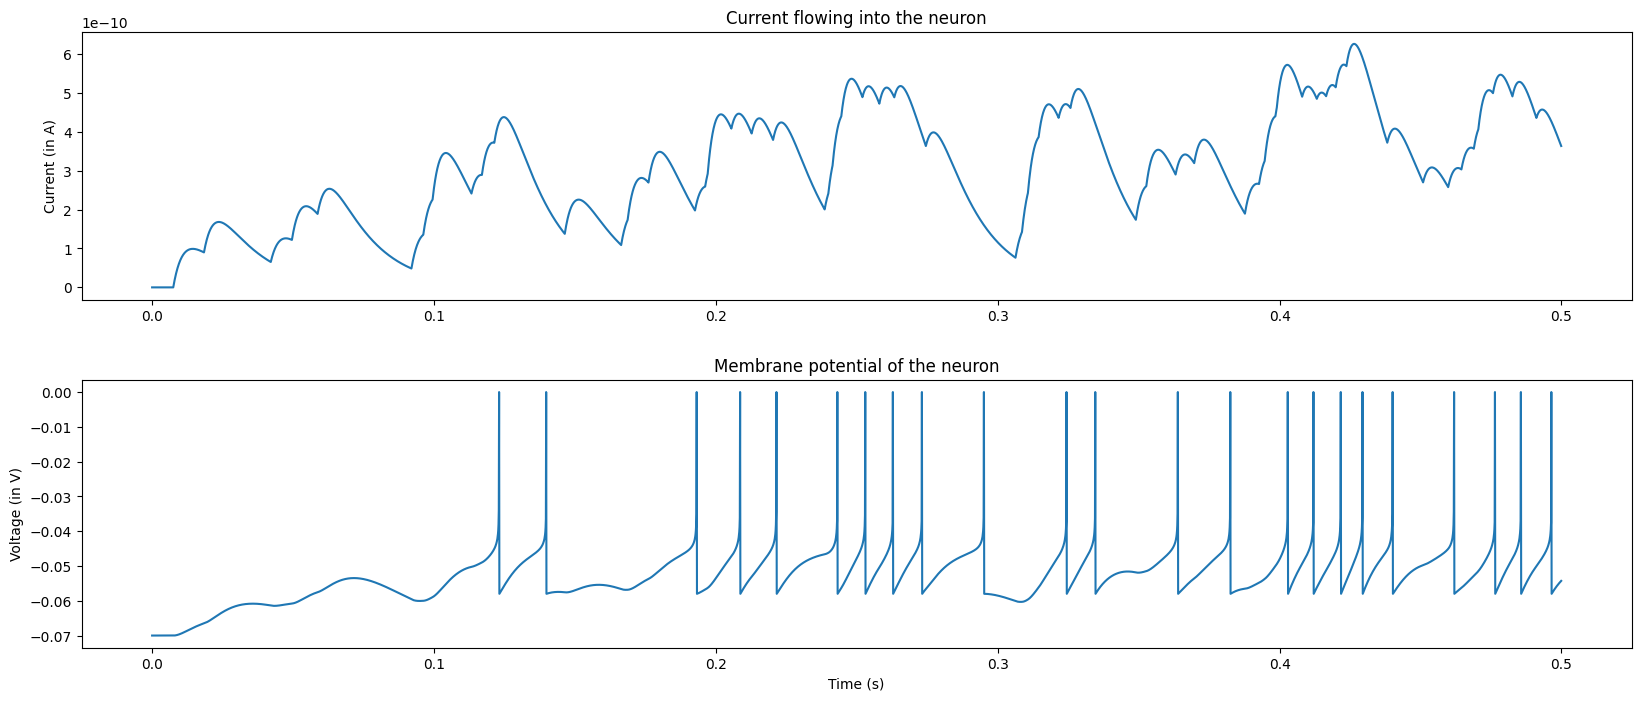

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 8))

axes[0].plot(t, Iapp)
axes[0].set_title("Current flowing into the neuron")
axes[0].set_ylabel("Current (in A)")

axes[1].plot(t, V)
axes[1].set_title("Membrane potential of the neuron")
axes[1].set_ylabel("Voltage (in V)")

axes[1].set_xlabel("Time (s)", fontsize=10)

plt.subplots_adjust(hspace=0.3)

### We observe a total of 23 spikes because the neuron now gets sufficient current to spike

# **Question - 3**

In [12]:
# Define parameters
T = 500*1e-3
dt = 0.1*1e-3
lmbda = 1*dt  # Arrival rate in per millisecond (10/s converted to per ms)

num_steps = int(T/dt)
t = np.arange(0,num_steps)*dt # Time axis for plotting

I0 = 1e-12
we = np.zeros(100)
tau = 15*1e-3
taus = tau/4

spike_times_all = [] # Array to store arrival times for all synapses

# Generate Poisson events
for i in range(100):
  spike_times = []
  for step in range(num_steps):
      # Generate a random number from a Poisson distribution with the given lambda
      event = np.random.poisson(lmbda)

      # If an event occurred, record the time
      if event > 0:
          spike_time = round(step*dt, 4)
          spike_times.append(spike_time)
  spike_times_all.append(spike_times)

we = np.random.normal(50, 5, 100)

Iterations: 6


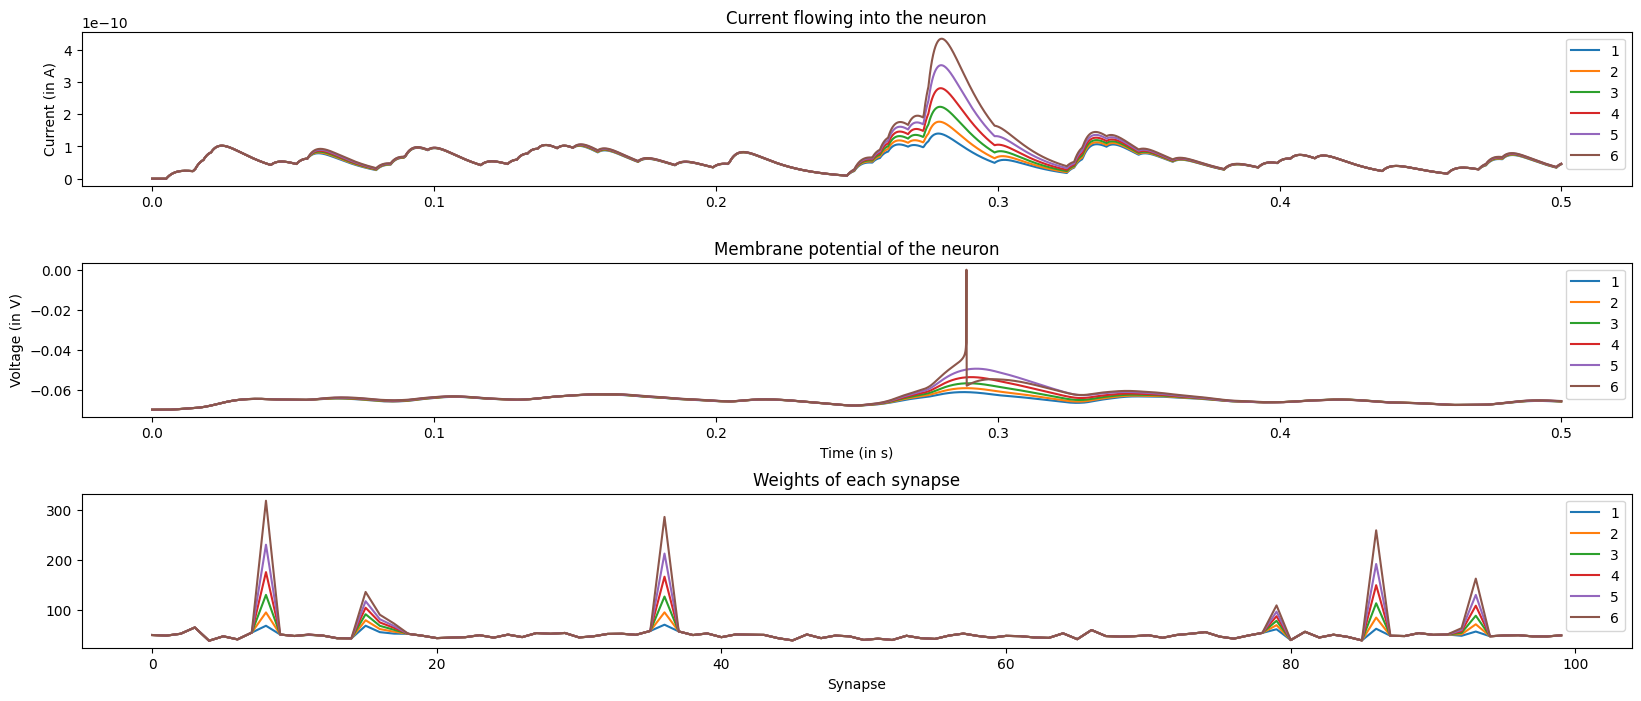

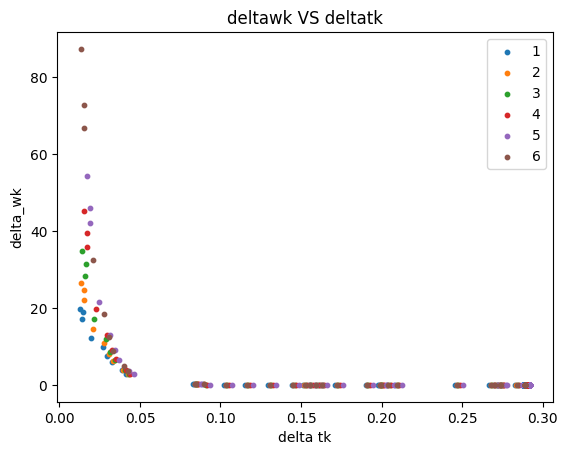

In [13]:
C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

gamma = 1

num_spikes = 0
iterations = 0

deltatk = np.zeros(100)
deltawk = np.zeros(100)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))
plt.subplots_adjust(hspace=0.5)

plt.figure(2)
plt.title("deltawk VS deltatk")

while (num_spikes == 0):

  Iapp = np.zeros(num_steps)

  for step in range(num_steps):
    for i in range(100):
      for spike in spike_times_all[i]:
        if (spike > step*dt):
          break
        Iapp[step] += I0*we[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

  V = np.zeros(num_steps);
  U = np.zeros(num_steps);
  V[0] = -70e-3;
  U[0] = 0;

  for time in range(num_steps-1):
    kv = (1/C)*(-gL*(V[time] - EL) + gL*deltaT*pow(math.e,((V[time] - VT)/deltaT)) + Iapp[time] - U[time])
    ku = (1/tauw)*(a*(V[time] - EL) - U[time])
    V[time + 1] = V[time] + kv*dt #updated V using Euler's method
    U[time + 1] = U[time] + ku*dt #updated U using Euler's method

    if (V[time + 1] >= 0): #identify a spike for a neuron
      V[time + 1] = Vr # reset the voltage
      V[time] = 0
      U[time + 1] = U[time] + b # reset U
      num_spikes += 1

  tmax = np.array(V).argmax()*dt

  for i in range (100):
    tk = 0
    for time in spike_times_all[i]:
      if (time < tmax):
        tk = time
    assert(tmax >= tk)
    deltatk[i] = tmax-tk
    deltawk[i] = we[i]*gamma*(np.exp(-(deltatk[i])/tau) - np.exp(-(deltatk[i])/taus))
    we[i] += deltawk[i]
    we[i] = min(500, we[i])

  iterations += 1

  axes[0].plot(t, Iapp)
  axes[0].set_title("Current flowing into the neuron")
  axes[0].set_ylabel("Current (in A)")

  axes[1].plot(t, V)
  axes[1].set_title("Membrane potential of the neuron")
  axes[1].set_ylabel("Voltage (in V)")

  axes[1].set_xlabel("Time (in s)")

  axes[2].plot(np.arange(0,100), we)
  axes[2].set_title("Weights of each synapse")

  axes[2].set_xlabel("Synapse")

  plt.figure(2)
  plt.scatter(deltatk, deltawk, s=10)
  plt.ylabel("delta_wk")
  plt.xlabel("delta tk")

  plt.subplots_adjust(hspace=0.5)

axes[0].legend(np.arange(1, iterations+1))
axes[1].legend(np.arange(1, iterations+1))
axes[2].legend(np.arange(1, iterations+1))
plt.legend(np.arange(1, iterations+1))

print("Iterations:", iterations)

### We were able to generate a neuron spike by iteratively changing the weights for each synapse. As these weights were changed, the current increased and the neuron spiked.
### A total of 6 iterations of weights update was required, including the initial calculations

# **Question - 4**

In [14]:
# Define parameters
T = 500*1e-3
dt = 0.1*1e-3
lmbda = 1*dt  # Arrival rate in per millisecond (10/s converted to per ms)

num_steps = int(T/dt)
t = np.arange(0,num_steps)*dt # Time axis for plotting

I0 = 1e-12
we = np.zeros(100)
tau = 15*1e-3
taus = tau/4

spike_times_all = [] # Array to store arrival times for all synapses

# Generate Poisson events
for i in range(100):
  spike_times = []
  for step in range(num_steps):
      # Generate a random number from a Poisson distribution with the given lambda
      event = np.random.poisson(lmbda)

      # If an event occurred, record the time
      if event > 0:
          spike_time = round(step*dt, 4)
          spike_times.append(spike_time)
  spike_times_all.append(spike_times)

we = np.random.normal(250, 25, 100)

Iterations: 2


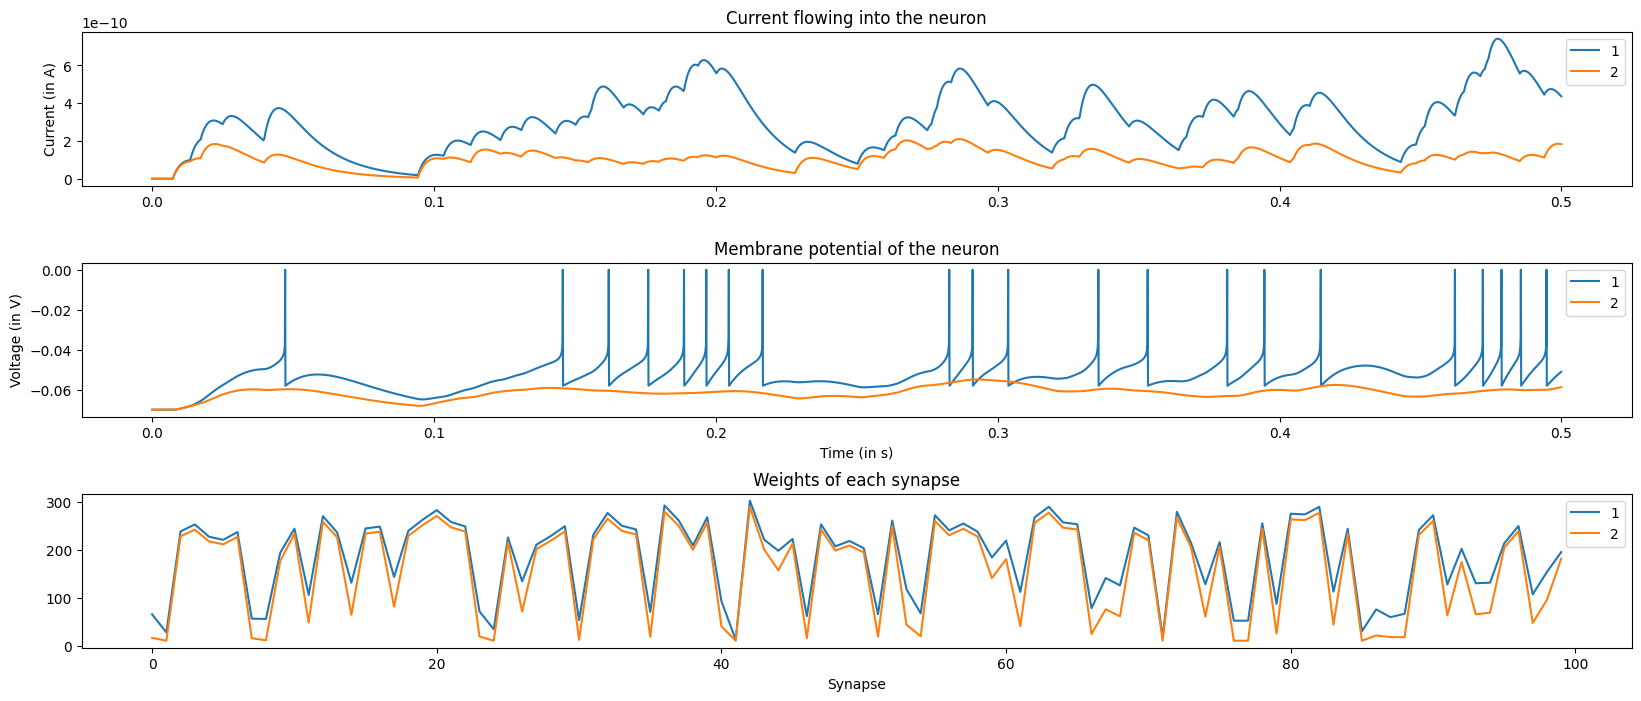

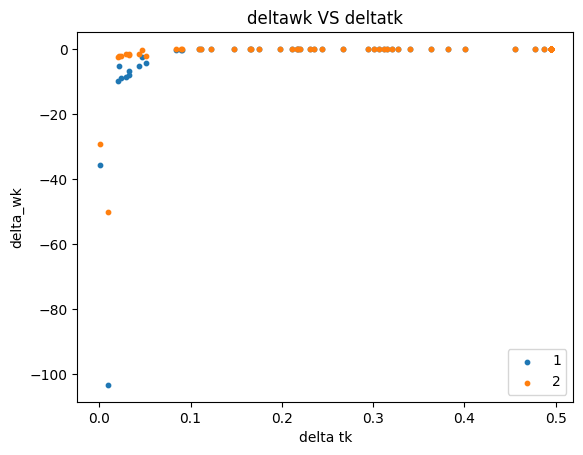

In [15]:
C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

gamma = 1

num_spikes = 20
iterations = 0

deltatk = np.zeros(100)
deltawk = np.zeros(100)

neuron_spike_times = []

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))
plt.subplots_adjust(hspace=0.5)

plt.figure(2)
plt.title("deltawk VS deltatk")

while (num_spikes != 0):

  num_spikes = 0
  Iapp = np.zeros(num_steps)

  for step in range(num_steps):
    for i in range(100):
      for spike in spike_times_all[i]:
        if (spike > step*dt):
          break
        Iapp[step] += I0*we[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

  V = np.zeros(num_steps);
  U = np.zeros(num_steps);
  V[0] = -70e-3;
  U[0] = 0;

  for time in range(num_steps-1):
    kv = (1/C)*(-gL*(V[time] - EL) + gL*deltaT*pow(math.e,((V[time] - VT)/deltaT)) + Iapp[time] - U[time])
    ku = (1/tauw)*(a*(V[time] - EL) - U[time])
    V[time + 1] = V[time] + kv*dt #updated V using Euler's method
    U[time + 1] = U[time] + ku*dt #updated U using Euler's method

    if (V[time + 1] >= 0): #identify a spike for a neuron
      V[time + 1] = Vr # reset the voltage
      V[time] = 0
      U[time + 1] = U[time] + b # reset U
      num_spikes += 1
      neuron_spike_times.append(time*dt)

  for spike in neuron_spike_times:
    for i in range (100):
      tk  = 0
      for time in spike_times_all[i]:
        if (time < spike):
          tk = time
      assert(spike >= tk)
      deltatk[i] = spike-tk
      deltawk[i] = -we[i]*gamma*(np.exp(-(deltatk[i])/tau) - np.exp(-(deltatk[i])/taus))
      we[i] += deltawk[i]
      we[i] = max(10, we[i])

  iterations += 1

  axes[0].plot(t, Iapp)
  axes[0].set_title("Current flowing into the neuron")
  axes[0].set_ylabel("Current (in A)")

  axes[1].plot(t, V)
  axes[1].set_title("Membrane potential of the neuron")
  axes[1].set_ylabel("Voltage (in V)")

  axes[1].set_xlabel("Time (in s)")

  axes[2].plot(np.arange(0,100), we)
  axes[2].set_title("Weights of each synapse")

  axes[2].set_xlabel("Synapse")

  plt.figure(2)
  plt.scatter(deltatk, deltawk, s=10)
  plt.ylabel("delta_wk")
  plt.xlabel("delta tk")

  plt.subplots_adjust(hspace=0.5)

axes[0].legend(np.arange(1, iterations+1))
axes[1].legend(np.arange(1, iterations+1))
axes[2].legend(np.arange(1, iterations+1))
plt.legend(np.arange(1, iterations+1))

print("Iterations:", iterations)

### We were able to remove all neuron spikes by iteratively changing the weights for each synapse. As these weights were changed, the current decreased and the neuron spikes were removed.
### A total of 2 iterations of weights update was required, including the initial calculations

# **Question - 5**

## Part-(a)

In [16]:
# Define parameters
T = 500*1e-3
dt = 0.1*1e-3
lmbda = 1*dt  # Arrival rate in per millisecond (10/s converted to per ms)

num_steps = int(T/dt)
t = np.arange(0,num_steps)*dt # Time axis for plotting

I0 = 1e-12
we1 = np.zeros(100)
tau = 15*1e-3
taus = tau/4

spike_times_all2 = [] # Array to store arrival times for all synapses

# Generate Poisson events
for i in range(100):
  spike_times = []
  for step in range(num_steps):
      # Generate a random number from a Poisson distribution with the given lambda
      event = np.random.poisson(lmbda)

      # If an event occurred, record the time
      if event > 0:
          spike_time = round(step*dt, 4)
          spike_times.append(spike_time)
  spike_times_all2.append(spike_times)

spike_times_all1 = [] # Array to store arrival times for all synapses

# Generate Poisson events
for i in range(100):
  spike_times = []
  for step in range(num_steps):
      # Generate a random number from a Poisson distribution with the given lambda
      event = np.random.poisson(lmbda)

      # If an event occurred, record the time
      if event > 0:
          spike_time = round(step*dt, 4)
          spike_times.append(spike_time)
  spike_times_all1.append(spike_times)

w0 = np.random.normal(200, 20, 100)

lst = []
for i in range(100):
  lst.append(w0[i])

w0_prime = np.asarray(lst)

In [17]:
Iapp1 = np.zeros(num_steps)

for step in range(num_steps):
  for i in range(100):
    for spike in spike_times_all1[i]:
      if (spike > step*dt):
        break
      Iapp1[step] += I0*w0[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

V1 = np.zeros(num_steps);
U1 = np.zeros(num_steps);
V1[0] = -70e-3;
U1[0] = 0;

for time in range(num_steps-1):
  kv = (1/C)*(-gL*(V1[time] - EL) + gL*deltaT*pow(math.e,((V1[time] - VT)/deltaT)) + Iapp1[time] - U1[time])
  ku = (1/tauw)*(a*(V1[time] - EL) - U1[time])
  V1[time + 1] = V1[time] + kv*dt #updated V using Euler's method
  U1[time + 1] = U1[time] + ku*dt #updated U using Euler's method

  if (V1[time + 1] >= 0): #identify a spike for a neuron
    V1[time + 1] = Vr # reset the voltage
    V1[time] = 0
    U1[time + 1] = U1[time] + b # reset U

In [18]:
Iapp2 = np.zeros(num_steps)

for step in range(num_steps):
  for i in range(100):
    for spike in spike_times_all2[i]:
      if (spike > step*dt):
        break
      Iapp2[step] += I0*w0[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

V2 = np.zeros(num_steps);
U2 = np.zeros(num_steps);
V2[0] = -70e-3;
U2[0] = 0;

for time in range(num_steps-1):
  kv = (1/C)*(-gL*(V2[time] - EL) + gL*deltaT*pow(math.e,((V2[time] - VT)/deltaT)) + Iapp2[time] - U2[time])
  ku = (1/tauw)*(a*(V2[time] - EL) - U2[time])
  V2[time + 1] = V2[time] + kv*dt #updated V using Euler's method
  U2[time + 1] = U2[time] + ku*dt #updated U using Euler's method

  if (V2[time + 1] >= 0): #identify a spike for a neuron
    V2[time + 1] = Vr # reset the voltage
    V2[time] = 0
    U2[time + 1] = U2[time] + b # reset U

Text(0, 0.5, 'Voltage (in V)')

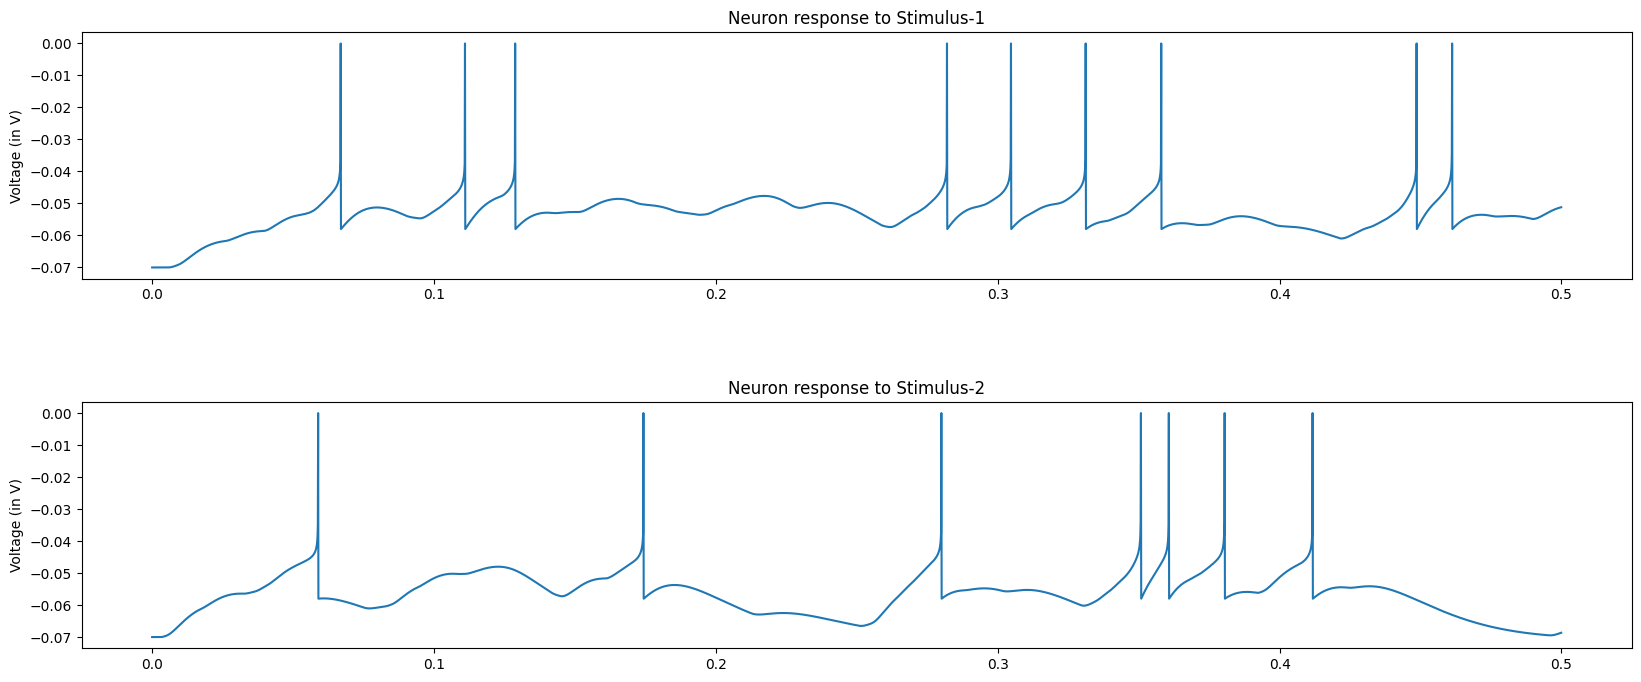

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 8))
plt.subplots_adjust(hspace=0.5)

axes[0].plot(t, V1)
axes[0].set_title("Neuron response to Stimulus-1")
axes[0].set_ylabel("Voltage (in V)")

axes[1].plot(t, V2)
axes[1].set_title("Neuron response to Stimulus-2")
axes[1].set_ylabel("Voltage (in V)")

### Two stimulus patterns have been randomly generated and the above figure shows the neuron response to each stimulus. We can observe spikes for both stimuli

## Part-(b)

### We now try and remove all spikes for Stimulus-2 and observe the neuron response to each stimulus with the new weights

Iterations: 2


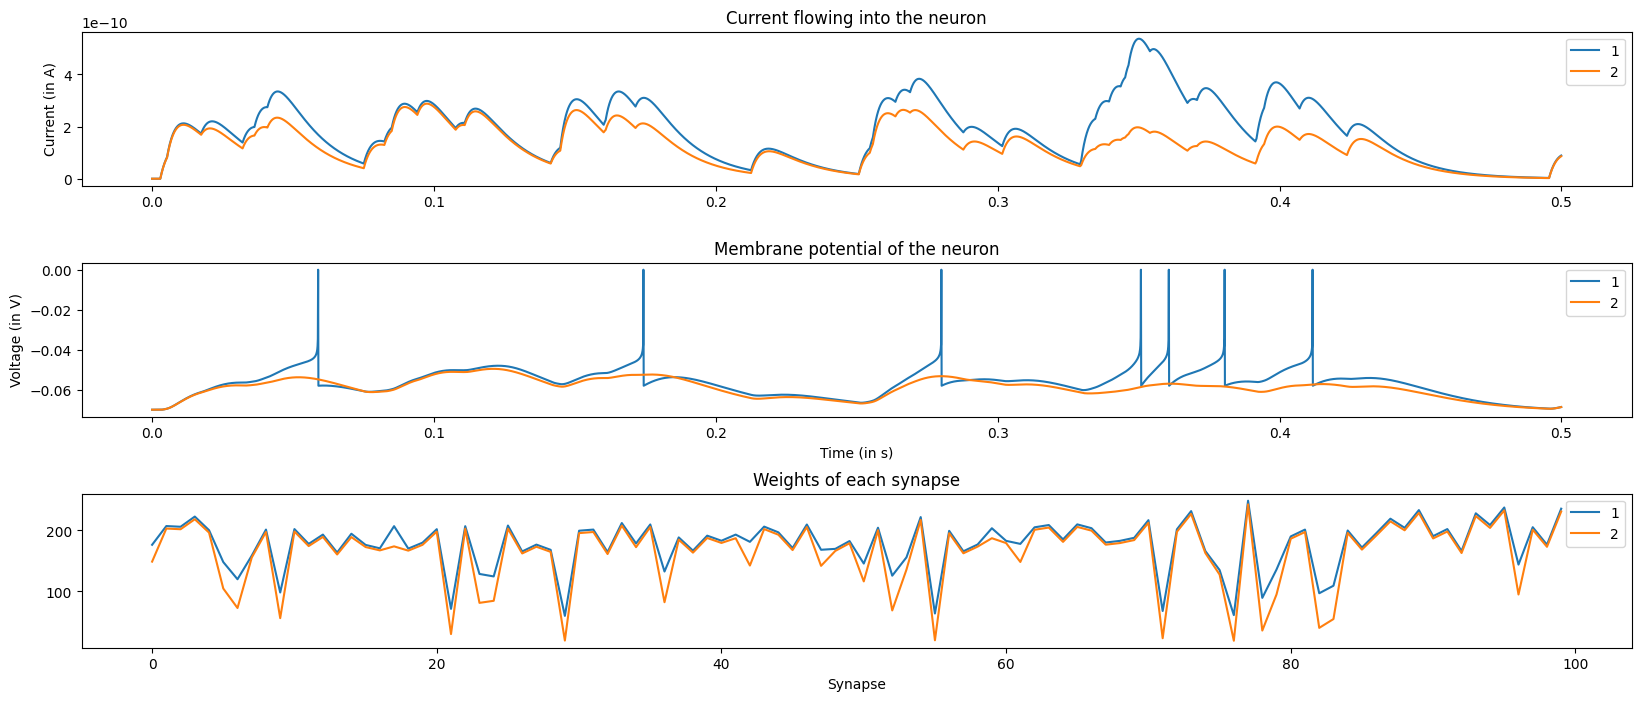

In [20]:
we = w0
spike_times_all = spike_times_all2

C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

gamma = 1

num_spikes = 20
iterations = 0

deltatk = np.zeros(100)
deltawk = np.zeros(100)

neuron_spike_times = []

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))
plt.subplots_adjust(hspace=0.5)

while (num_spikes != 0):

  num_spikes = 0
  Iapp = np.zeros(num_steps)

  for step in range(num_steps):
    for i in range(100):
      for spike in spike_times_all[i]:
        if (spike > step*dt):
          break
        Iapp[step] += I0*we[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

  V = np.zeros(num_steps);
  U = np.zeros(num_steps);
  V[0] = -70e-3;
  U[0] = 0;

  for time in range(num_steps-1):
    kv = (1/C)*(-gL*(V[time] - EL) + gL*deltaT*pow(math.e,((V[time] - VT)/deltaT)) + Iapp[time] - U[time])
    ku = (1/tauw)*(a*(V[time] - EL) - U[time])
    V[time + 1] = V[time] + kv*dt #updated V using Euler's method
    U[time + 1] = U[time] + ku*dt #updated U using Euler's method

    if (V[time + 1] >= 0): #identify a spike for a neuron
      V[time + 1] = Vr # reset the voltage
      V[time] = 0
      U[time + 1] = U[time] + b # reset U
      num_spikes += 1
      neuron_spike_times.append(time*dt)

  for spike in neuron_spike_times:
    for i in range (100):
      tk  = 0
      for time in spike_times_all[i]:
        if (time < spike):
          tk = time
      assert(spike >= tk)
      deltatk[i] = spike-tk
      deltawk[i] = we[i]*gamma*(np.exp(-(deltatk[i])/tau) - np.exp(-(deltatk[i])/taus))
      we[i] += -deltawk[i]
      we[i] = max(10, we[i])

  iterations += 1

  axes[0].plot(t, Iapp)
  axes[0].set_title("Current flowing into the neuron")
  axes[0].set_ylabel("Current (in A)")

  axes[1].plot(t, V)
  axes[1].set_title("Membrane potential of the neuron")
  axes[1].set_ylabel("Voltage (in V)")

  axes[1].set_xlabel("Time (in s)")

  axes[2].plot(np.arange(0,100), we)
  axes[2].set_title("Weights of each synapse")

  axes[2].set_xlabel("Synapse")

  plt.subplots_adjust(hspace=0.5)

axes[0].legend(np.arange(1, iterations+1))
axes[1].legend(np.arange(1, iterations+1))
axes[2].legend(np.arange(1, iterations+1))
plt.legend(np.arange(1, iterations+1))

print("Iterations:", iterations)

w1 = we

### Using the spike removal technique from Part (4), we were able to remove all neuron spikes from the Stimulus-2 pattern and obtained the new weights $w_1$

## Part-(c)

In [21]:
Iapp1 = np.zeros(num_steps)

for step in range(num_steps):
  for i in range(100):
    for spike in spike_times_all1[i]:
      if (spike > step*dt):
        break
      Iapp1[step] += I0*w1[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

V1 = np.zeros(num_steps);
U1 = np.zeros(num_steps);
V1[0] = -70e-3;
U1[0] = 0;

for time in range(num_steps-1):
  kv = (1/C)*(-gL*(V1[time] - EL) + gL*deltaT*pow(math.e,((V1[time] - VT)/deltaT)) + Iapp1[time] - U1[time])
  ku = (1/tauw)*(a*(V1[time] - EL) - U1[time])
  V1[time + 1] = V1[time] + kv*dt #updated V using Euler's method
  U1[time + 1] = U1[time] + ku*dt #updated U using Euler's method

  if (V1[time + 1] >= 0): #identify a spike for a neuron
    V1[time + 1] = Vr # reset the voltage
    V1[time] = 0
    U1[time + 1] = U1[time] + b # reset U

In [22]:
Iapp2 = np.zeros(num_steps)

for step in range(num_steps):
  for i in range(100):
    for spike in spike_times_all2[i]:
      if (spike > step*dt):
        break
      Iapp2[step] += I0*w1[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

V2 = np.zeros(num_steps);
U2 = np.zeros(num_steps);
V2[0] = -70e-3;
U2[0] = 0;

for time in range(num_steps-1):
  kv = (1/C)*(-gL*(V2[time] - EL) + gL*deltaT*pow(math.e,((V2[time] - VT)/deltaT)) + Iapp2[time] - U2[time])
  ku = (1/tauw)*(a*(V2[time] - EL) - U2[time])
  V2[time + 1] = V2[time] + kv*dt #updated V using Euler's method
  U2[time + 1] = U2[time] + ku*dt #updated U using Euler's method

  if (V2[time + 1] >= 0): #identify a spike for a neuron
    V2[time + 1] = Vr # reset the voltage
    V2[time] = 0
    U2[time + 1] = U2[time] + b # reset U

Text(0, 0.5, 'Voltage (in V)')

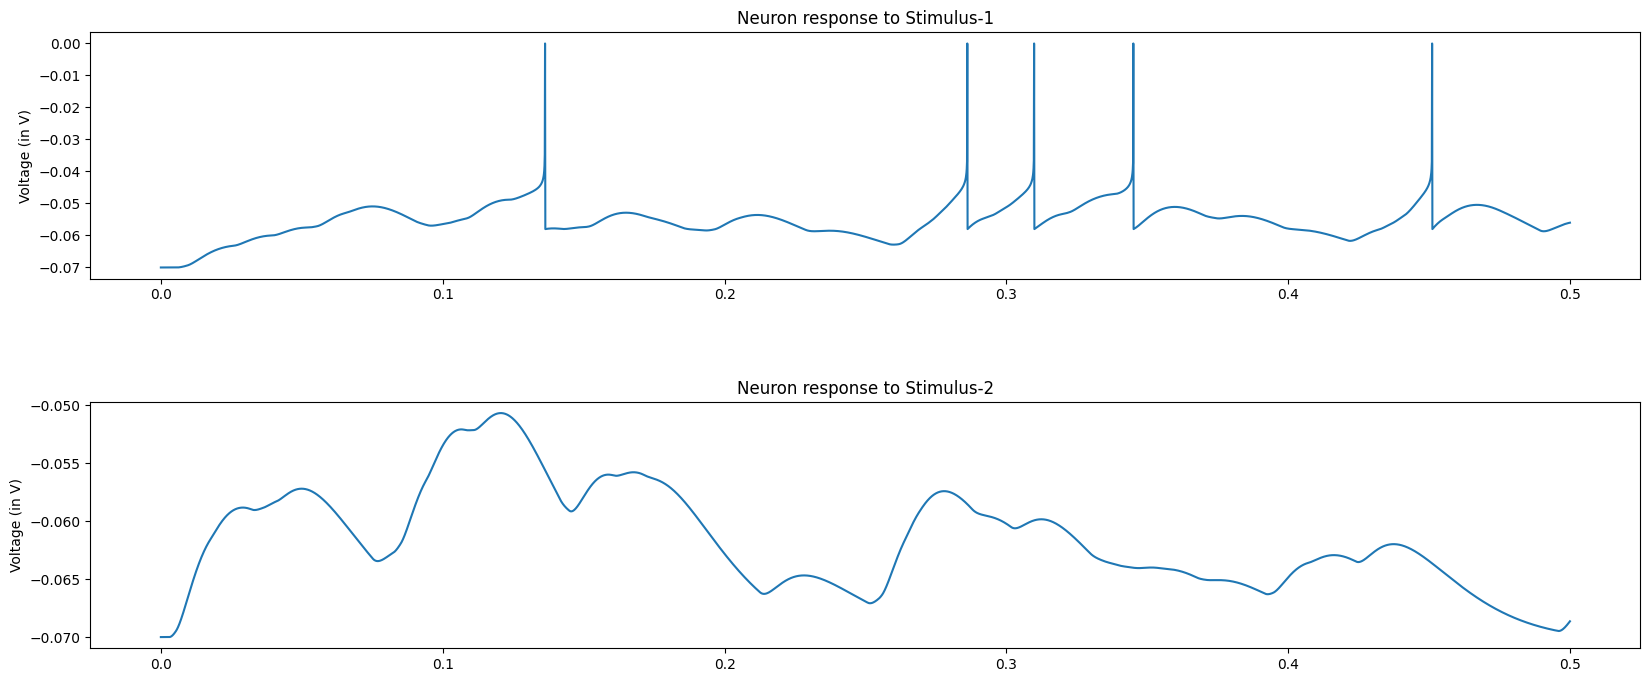

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 8))
plt.subplots_adjust(hspace=0.5)

axes[0].plot(t, V1)
axes[0].set_title("Neuron response to Stimulus-1")
axes[0].set_ylabel("Voltage (in V)")

axes[1].plot(t, V2)
axes[1].set_title("Neuron response to Stimulus-2")
axes[1].set_ylabel("Voltage (in V)")

### The above plot shows the response of the neuron to each stimuli using the updated weights $w_1$. We can observe that all spikes for Stimulus-2 have been removed but we can still observe spikes for Stimulus-1. Therefore, the weight configuration $w_1$ allows us to distinguish between the two stimuli

## Part-(d)

### Now we perform the reverse process. We remove all spikes for Stimulus-1 and then observe the response of the neuron to each stimulus with the new weights

Iterations: 2


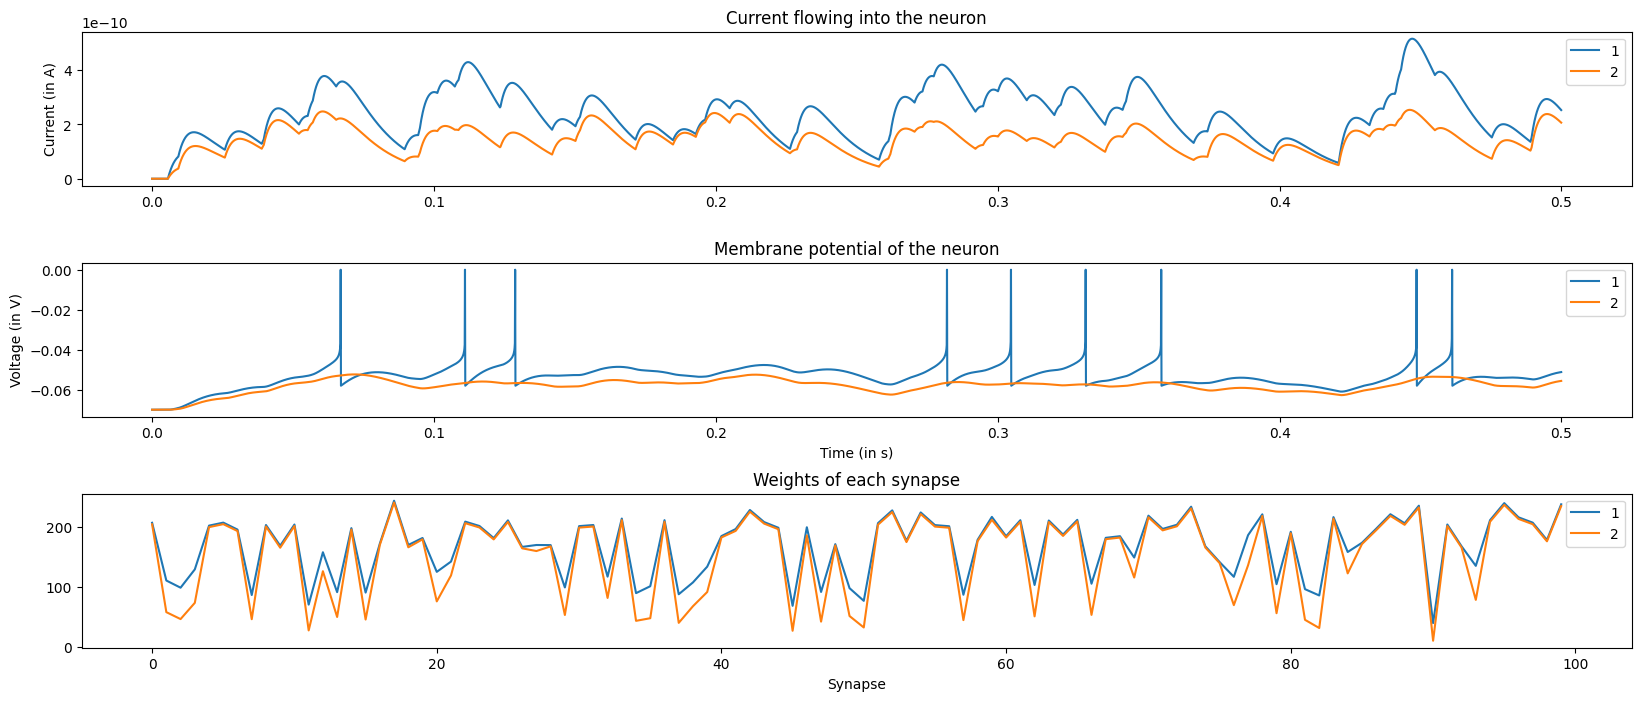

In [24]:
we = w0_prime
spike_times_all = spike_times_all1

C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

gamma = 1

num_spikes = 20
iterations = 0

deltatk = np.zeros(100)
deltawk = np.zeros(100)

neuron_spike_times = []

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 8))
plt.subplots_adjust(hspace=0.5)

while (num_spikes != 0):

  num_spikes = 0
  Iapp = np.zeros(num_steps)

  for step in range(num_steps):
    for i in range(100):
      for spike in spike_times_all[i]:
        if (spike > step*dt):
          break
        Iapp[step] += I0*we[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

  V = np.zeros(num_steps);
  U = np.zeros(num_steps);
  V[0] = -70e-3;
  U[0] = 0;

  for time in range(num_steps-1):
    kv = (1/C)*(-gL*(V[time] - EL) + gL*deltaT*pow(math.e,((V[time] - VT)/deltaT)) + Iapp[time] - U[time])
    ku = (1/tauw)*(a*(V[time] - EL) - U[time])
    V[time + 1] = V[time] + kv*dt #updated V using Euler's method
    U[time + 1] = U[time] + ku*dt #updated U using Euler's method

    if (V[time + 1] >= 0): #identify a spike for a neuron
      V[time + 1] = Vr # reset the voltage
      V[time] = 0
      U[time + 1] = U[time] + b # reset U
      num_spikes += 1
      neuron_spike_times.append(time*dt)

  for spike in neuron_spike_times:
    for i in range (100):
      tk  = 0
      for time in spike_times_all[i]:
        if (time < spike):
          tk = time
      assert(spike >= tk)
      deltatk[i] = spike-tk
      deltawk[i] = we[i]*gamma*(np.exp(-(deltatk[i])/tau) - np.exp(-(deltatk[i])/taus))
      we[i] += -deltawk[i]
      we[i] = max(10, we[i])

  iterations += 1

  axes[0].plot(t, Iapp)
  axes[0].set_title("Current flowing into the neuron")
  axes[0].set_ylabel("Current (in A)")

  axes[1].plot(t, V)
  axes[1].set_title("Membrane potential of the neuron")
  axes[1].set_ylabel("Voltage (in V)")

  axes[1].set_xlabel("Time (in s)")

  axes[2].plot(np.arange(0,100), we)
  axes[2].set_title("Weights of each synapse")

  axes[2].set_xlabel("Synapse")

  plt.subplots_adjust(hspace=0.5)

axes[0].legend(np.arange(1, iterations+1))
axes[1].legend(np.arange(1, iterations+1))
axes[2].legend(np.arange(1, iterations+1))
plt.legend(np.arange(1, iterations+1))

print("Iterations:", iterations)

w1 = we

### Using the spike removal technique from Part (4), we were able to remove all neuron spikes from the Stimulus-1 pattern and obtained the new weights $w_1$

In [25]:
Iapp1 = np.zeros(num_steps)

for step in range(num_steps):
  for i in range(100):
    for spike in spike_times_all1[i]:
      if (spike > step*dt):
        break
      Iapp1[step] += I0*w1[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

V1 = np.zeros(num_steps);
U1 = np.zeros(num_steps);
V1[0] = -70e-3;
U1[0] = 0;

for time in range(num_steps-1):
  kv = (1/C)*(-gL*(V1[time] - EL) + gL*deltaT*pow(math.e,((V1[time] - VT)/deltaT)) + Iapp1[time] - U1[time])
  ku = (1/tauw)*(a*(V1[time] - EL) - U1[time])
  V1[time + 1] = V1[time] + kv*dt #updated V using Euler's method
  U1[time + 1] = U1[time] + ku*dt #updated U using Euler's method

  if (V1[time + 1] >= 0): #identify a spike for a neuron
    V1[time + 1] = Vr # reset the voltage
    V1[time] = 0
    U1[time + 1] = U1[time] + b # reset U

In [26]:
Iapp2 = np.zeros(num_steps)

for step in range(num_steps):
  for i in range(100):
    for spike in spike_times_all2[i]:
      if (spike > step*dt):
        break
      Iapp2[step] += I0*w1[i]*(np.exp(-(step*dt-spike)/tau) - np.exp(-(step*dt-spike)/taus))

C = 200*1e-12
gL = 10*1e-9
EL = -70*1e-3
VT = -50*1e-3
deltaT = 2*1e-3
a = 2*1e-9
tauw = 30*1e-3
b = 0
Vr = -58*1e-3

V2 = np.zeros(num_steps);
U2 = np.zeros(num_steps);
V2[0] = -70e-3;
U2[0] = 0;

for time in range(num_steps-1):
  kv = (1/C)*(-gL*(V2[time] - EL) + gL*deltaT*pow(math.e,((V2[time] - VT)/deltaT)) + Iapp2[time] - U2[time])
  ku = (1/tauw)*(a*(V2[time] - EL) - U2[time])
  V2[time + 1] = V2[time] + kv*dt #updated V using Euler's method
  U2[time + 1] = U2[time] + ku*dt #updated U using Euler's method

  if (V2[time + 1] >= 0): #identify a spike for a neuron
    V2[time + 1] = Vr # reset the voltage
    V2[time] = 0
    U2[time + 1] = U2[time] + b # reset U

Text(0, 0.5, 'Voltage (in V)')

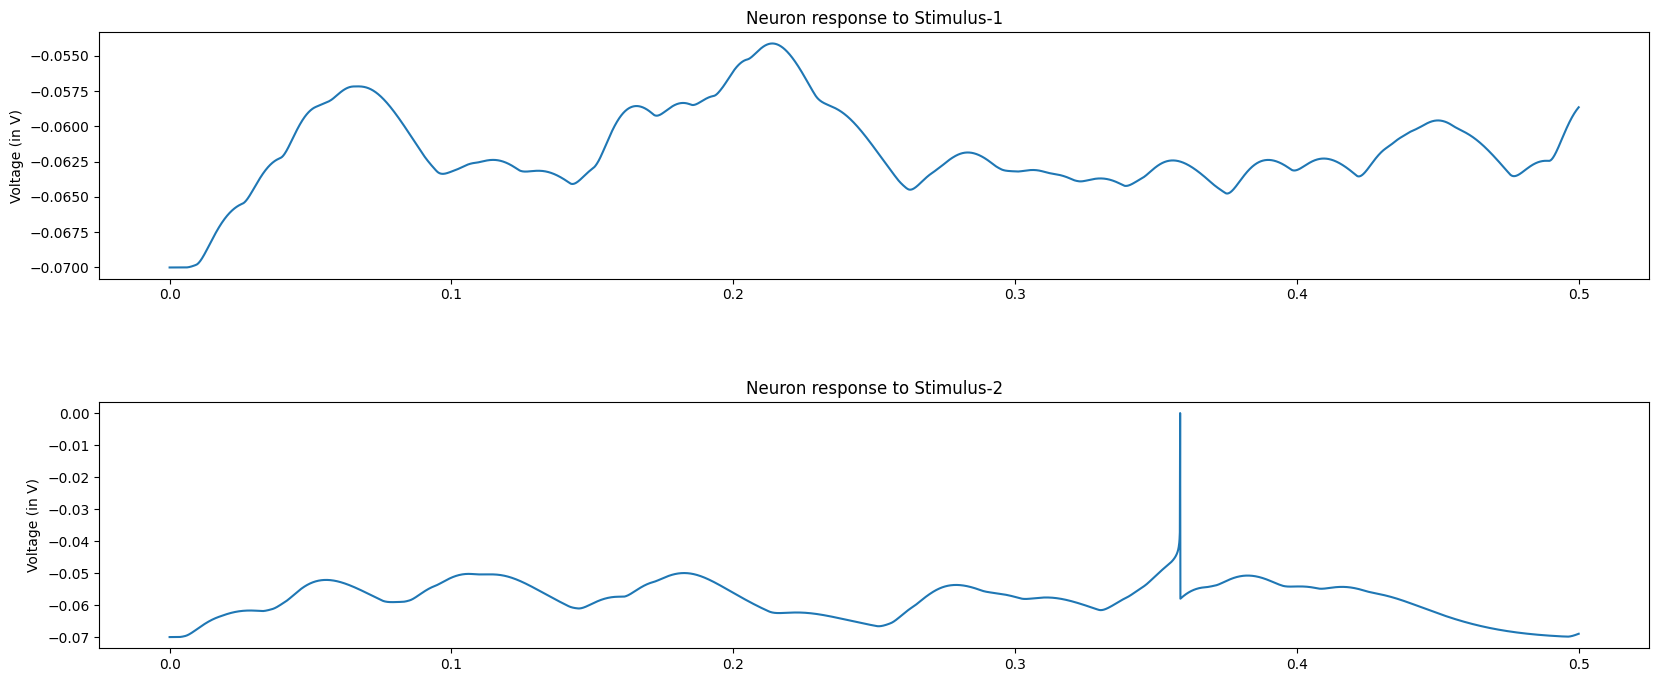

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 8))
plt.subplots_adjust(hspace=0.5)

axes[0].plot(t, V1)
axes[0].set_title("Neuron response to Stimulus-1")
axes[0].set_ylabel("Voltage (in V)")

axes[1].plot(t, V2)
axes[1].set_title("Neuron response to Stimulus-2")
axes[1].set_ylabel("Voltage (in V)")

### The above plot shows the response of the neuron to each stimuli using the updated weights $w_1$. We can observe that all spikes for Stimulus-1 have been removed but we can still observe spikes for Stimulus-2. Therefore, the weight configuration $w_1$ allows us to distinguish between the two stimuli